In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats


In [2]:
columns_name = [
    'timestamp','sex','matric_gpa_%' ,'study_year','faculty','gpa_%_2023','accommodation_status',
    'monthly_allowance','scholarship','study_hours_week','socialising_week','drinks_night',
    'classes_missed','modules_failed','in_relationship','parental_approval','relationship_parents'
]

student_data  = pd.read_csv("Stats survey.csv", names = columns_name, header = 0)

In [3]:
student_data.head()

,timestamp,sex,matric_gpa_%,study_year,faculty,gpa_%_2023,accommodation_status,monthly_allowance,scholarship,study_hours_week,socialising_week,drinks_night,classes_missed,modules_failed,in_relationship,parental_approval,relationship_parents
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


## Exploratory Data Analysis

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             406 non-null    object 
 1   sex                   404 non-null    object 
 2   matric_gpa_%          399 non-null    float64
 3   study_year            333 non-null    object 
 4   faculty               399 non-null    object 
 5   gpa_%_2023            320 non-null    float64
 6   accommodation_status  383 non-null    object 
 7   monthly_allowance     375 non-null    object 
 8   scholarship           398 non-null    object 
 9   study_hours_week      403 non-null    object 
 10  socialising_week      404 non-null    object 
 11  drinks_night          404 non-null    object 
 12  classes_missed        403 non-null    object 
 13  modules_failed        403 non-null    object 
 14  in_relationship       403 non-null    object 
 15  parental_approval     4

In [5]:
student_data["sex"].value_counts(normalize=True )

sex
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

In this survey, there is 53% of male and 47% of female population.

In [6]:
table = pd.crosstab(student_data.parental_approval, student_data.relationship_parents)
table

relationship_parents,Close,Distant,Fair,Very close
parental_approval,,,,
No,18,1,9,20
Yes,79,1,25,248


<Axes: xlabel='relationship_parents'>

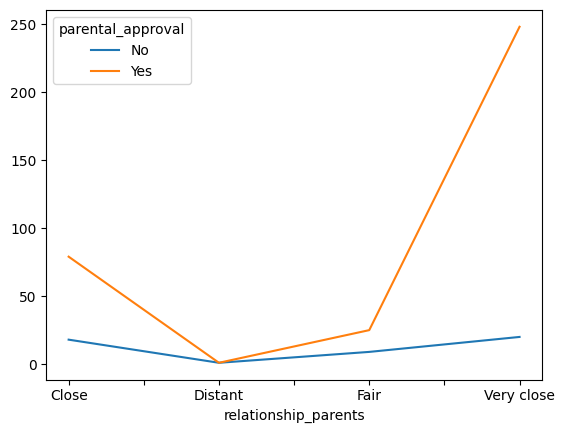

In [7]:
table.T.plot.line()

Description:



In [8]:
student_data.faculty.value_counts()

faculty
Economic & Management Sciences    211
Science                            56
Arts & Social Sciences             47
Engineering                        37
AgriSciences                       22
Medicine and Health Services       10
Law                                10
Education                           6
Name: count, dtype: int64

In [9]:
group_faculty= student_data.groupby(by = "faculty")


In [10]:
information = group_faculty["matric_gpa_%"].agg(("min","max","mean"))
information

,min,max,mean
faculty,,,
AgriSciences,66.0,86.0,74.772727
Arts & Social Sciences,60.0,85.0,75.969565
Economic & Management Sciences,34.0,99.0,76.977095
Education,71.0,82.0,76.000000
Engineering,73.0,98.0,83.691667
Law,72.0,90.0,80.200000
Medicine and Health Services,73.0,85.0,79.888889
Science,65.0,92.0,80.294727


<Axes: xlabel='faculty'>

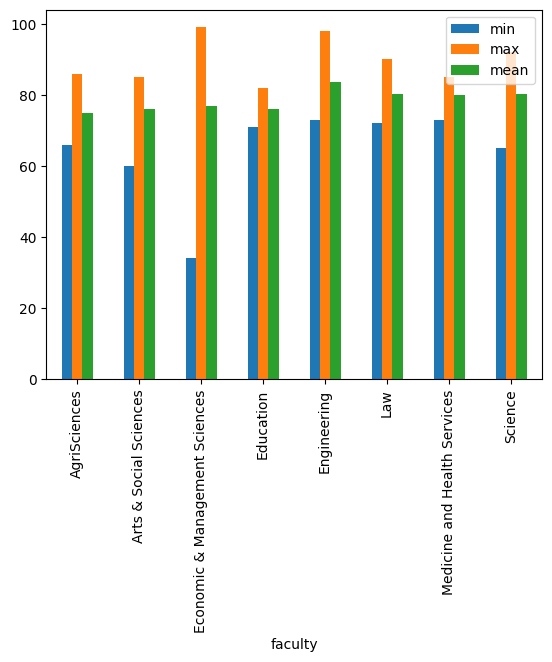

In [11]:
information.plot.bar()

Description:



In [12]:
student_data.accommodation_status.value_counts()

accommodation_status
Private accommodation/ stay with family/friends    335
Non-private accommodation ie. Res                   48
Name: count, dtype: int64

In [13]:
table = pd.crosstab(student_data.accommodation_status, student_data.socialising_week)
table

socialising_week,0,1,2,3,4+,Only weekends
accommodation_status,,,,,,
Non-private accommodation ie. Res,2,12,15,5,3,11
Private accommodation/ stay with family/friends,14,89,70,52,13,97


<Axes: xlabel='socialising_week', ylabel='accommodation_status'>

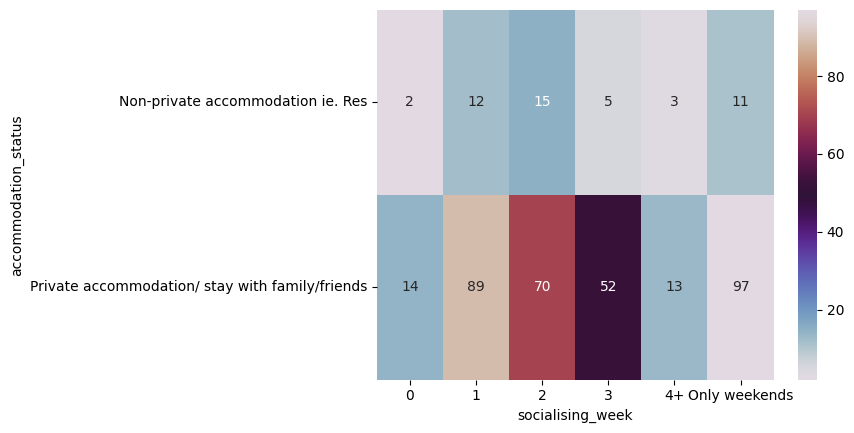

In [14]:
sns.heatmap(table, annot = True, cmap = "twilight")

* During weekends, **students stating with their friends and family are 9 time more likely** to party compared to hosrelers.
* In an average, privately housed stident party more than 7 times than student living in college.

In [15]:
# ho = no association
# h1 = yes association
# p_value < 0.05 == reject ho(null hypothesis) ie.h1 true( alternative hypothesis)

In [16]:
score, p_val, _, _ = stats.chi2_contingency(table)
print(score)
print(p_val)

3.9099046455825284
0.5624591514521107


since p_val is greater than 0.05, it infer that there is association/ relationship between socialising_week	 and accommodation_status	

## Influence of Gender on GPA

In [17]:
student_data.groupby("sex")["gpa_%_2023"].agg(("min","max","mean","std", "median"
                                              ))

,min,max,mean,std,median
sex,,,,,
Female,50.0,95.22,67.596067,8.834404,67.0
Male,30.0,92.00,65.097059,9.284666,64.0


sex
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: gpa_%_2023, dtype: object

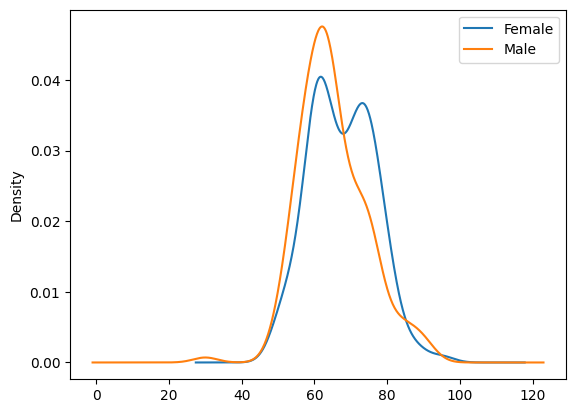

In [18]:
student_data.groupby("sex")["gpa_%_2023"].plot.kde(legend = True)

<Axes: xlabel='gpa_%_2023', ylabel='sex'>

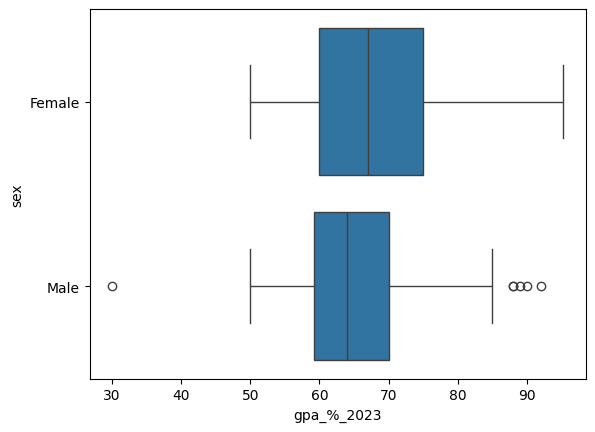

In [19]:
sns.boxplot(x ="gpa_%_2023", y= "sex", data= student_data)

In [20]:
student_data.scholarship.value_counts()

scholarship
No                     352
Yes (NSFAS, etc...)     46
Name: count, dtype: int64

In [21]:
table = pd.crosstab(student_data.scholarship, student_data.modules_failed)


In [22]:
352/46

7.6521739130434785

In [23]:
table

modules_failed,0,1,2,3,4+
scholarship,,,,,
No,230,49,29,20,23
"Yes (NSFAS, etc...)",27,9,2,4,4


<Axes: xlabel='modules_failed', ylabel='scholarship'>

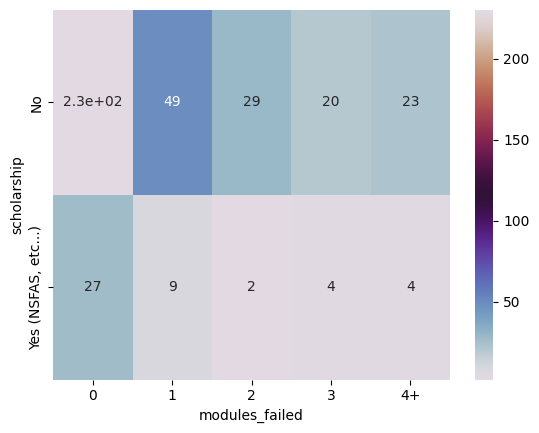

In [24]:
sns.heatmap(table, annot = True, cmap = "twilight")

In [25]:
score, p_val, _, _ = stats.chi2_contingency(table)
print(score)
print(p_val)

2.844930360651007
0.5841020962470809


<Axes: xlabel='matric_gpa_%', ylabel='gpa_%_2023'>

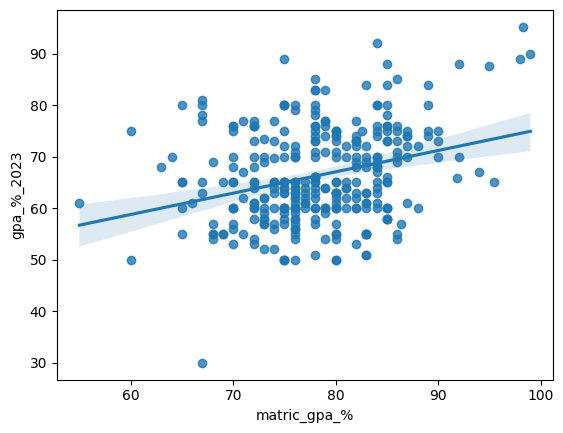

In [26]:
#student_data.plot.scatter("matric_gpa_%", "gpa_%_2023")
sns.regplot(x ="matric_gpa_%", y = "gpa_%_2023", data = student_data)

In [27]:
student_data[["matric_gpa_%", "gpa_%_2023"]].corr()

,matric_gpa_%,gpa_%_2023
matric_gpa_%,1.000000,0.299104
gpa_%_2023,0.299104,1.000000


In [28]:
student_data.isna().sum()

timestamp                0
sex                      2
matric_gpa_%             7
study_year              73
faculty                  7
gpa_%_2023              86
accommodation_status    23
monthly_allowance       31
scholarship              8
study_hours_week         3
socialising_week         2
drinks_night             2
classes_missed           3
modules_failed           3
in_relationship          3
parental_approval        4
relationship_parents     3
dtype: int64

# Manipulation and /or Cleaning Data


* remove unnecessary columns
* NUll value handling <- imputation
* handling outliers
* Feature selection
* 


In [29]:
student_data.head()

,timestamp,sex,matric_gpa_%,study_year,faculty,gpa_%_2023,accommodation_status,monthly_allowance,scholarship,study_hours_week,socialising_week,drinks_night,classes_missed,modules_failed,in_relationship,parental_approval,relationship_parents
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [30]:
# deleting timestamp column
student_data.drop("timestamp", axis = 1, inplace = True)

In [31]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   404 non-null    object 
 1   matric_gpa_%          399 non-null    float64
 2   study_year            333 non-null    object 
 3   faculty               399 non-null    object 
 4   gpa_%_2023            320 non-null    float64
 5   accommodation_status  383 non-null    object 
 6   monthly_allowance     375 non-null    object 
 7   scholarship           398 non-null    object 
 8   study_hours_week      403 non-null    object 
 9   socialising_week      404 non-null    object 
 10  drinks_night          404 non-null    object 
 11  classes_missed        403 non-null    object 
 12  modules_failed        403 non-null    object 
 13  in_relationship       403 non-null    object 
 14  parental_approval     402 non-null    object 
 15  relationship_parents  4

In [32]:
# Handling null value
student_data.isna().sum()

sex                      2
matric_gpa_%             7
study_year              73
faculty                  7
gpa_%_2023              86
accommodation_status    23
monthly_allowance       31
scholarship              8
study_hours_week         3
socialising_week         2
drinks_night             2
classes_missed           3
modules_failed           3
in_relationship          3
parental_approval        4
relationship_parents     3
dtype: int64

In [33]:
# removing conditional null values related to target
null_index =student_data[student_data[["study_year", "gpa_%_2023"]].isna().sum(axis =1) > 1].index

student_data.drop(null_index, axis = 0, inplace=True)

In [34]:
# if more than 5 columns null in a row
student_data=student_data[~(student_data.isna().sum(axis = 1) >= 5)]

In [35]:
student_data.isna().sum()

sex                      0
matric_gpa_%             3
study_year               1
faculty                  4
gpa_%_2023              14
accommodation_status     4
monthly_allowance       15
scholarship              0
study_hours_week         0
socialising_week         0
drinks_night             0
classes_missed           1
modules_failed           0
in_relationship          1
parental_approval        2
relationship_parents     1
dtype: int64

In [36]:
# filling categorical columns with mode

columns_to_fill =[
    'faculty','accommodation_status','monthly_allowance','scholarship','study_hours_week','classes_missed','modules_failed',
    'in_relationship','parental_approval','relationship_parents','study_year'
]

In [37]:
student_data.fillna(
    student_data[columns_to_fill].mode().loc[0], inplace = True
)

In [38]:
student_data.isna().sum()

sex                      0
matric_gpa_%             3
study_year               0
faculty                  0
gpa_%_2023              14
accommodation_status     0
monthly_allowance        0
scholarship              0
study_hours_week         0
socialising_week         0
drinks_night             0
classes_missed           0
modules_failed           0
in_relationship          0
parental_approval        0
relationship_parents     0
dtype: int64

<Axes: ylabel='Density'>

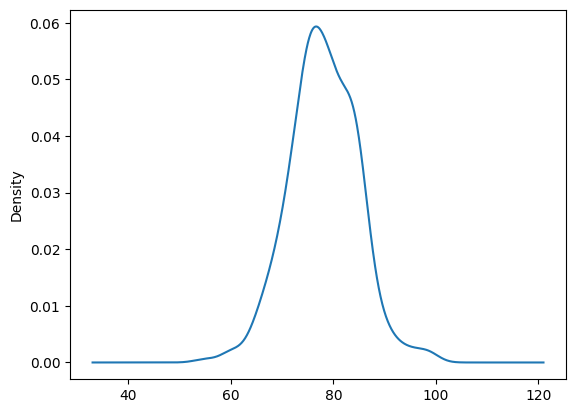

In [39]:
student_data["matric_gpa_%"].plot.kde()

In [40]:
# imputing continous numerical value

mean_gpa =student_data["matric_gpa_%"].mean()
student_data["matric_gpa_%"].fillna(mean_gpa, inplace = True)

mean_gpa =student_data["gpa_%_2023"].mean()
student_data["gpa_%_2023"].fillna(mean_gpa, inplace = True)

C:\Users\prate\AppData\Local\Temp\ipykernel_10632\2744312669.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_data["gpa_%_2023"].fillna(mean_gpa, inplace = True)


In [41]:
student_data.isna().sum()

sex                     0
matric_gpa_%            0
study_year              0
faculty                 0
gpa_%_2023              0
accommodation_status    0
monthly_allowance       0
scholarship             0
study_hours_week        0
socialising_week        0
drinks_night            0
classes_missed          0
modules_failed          0
in_relationship         0
parental_approval       0
relationship_parents    0
dtype: int64

In [42]:
#student_data[student_data[["study_year", "gpa_%_2023"]].isna().sum(axis =1) > 1] 

In [43]:
#student_data["study_year"].value_counts()

<Axes: >

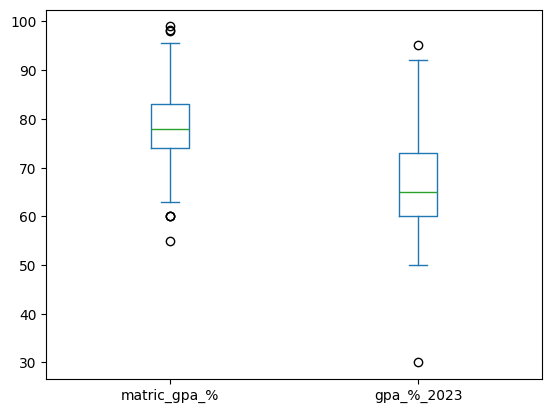

In [52]:
# outliers Handling
student_data[["matric_gpa_%","gpa_%_2023"]].plot.box()

In [53]:
# handling outlier with IQR
def handle_outlier(
    dataframe : pd.DataFrame, columns : list[str]
):
    for each_col in columns:
        print(f"working for {each_col} column")
        series =dataframe[each_col]
        q1 =  series.quantile(0.25)
        q3 =  series.quantile(0.75)
        iqr = q3 - q1
        max_v = q3 + 1.5 *iqr
        min_v = q1 - 1.5 *iqr

        to_drop =  series[ (series > max_v) | ( series < min_v)].index
        print(f"Dropping {to_drop} indexes")
        dataframe = dataframe.drop(to_drop, axis = 0, inplace = False)

    return dataframe        

In [54]:
student_data_no_outlier = handle_outlier(student_data, ["matric_gpa_%","gpa_%_2023"])


working for matric_gpa_% column
Dropping Index([38, 54, 73, 203, 268, 335, 358], dtype='int64') indexes
working for gpa_%_2023 column
Dropping Index([303], dtype='int64') indexes


In [50]:
student_data_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 0 to 405
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   326 non-null    object 
 1   matric_gpa_%          326 non-null    float64
 2   study_year            326 non-null    object 
 3   faculty               326 non-null    object 
 4   gpa_%_2023            326 non-null    float64
 5   accommodation_status  326 non-null    object 
 6   monthly_allowance     326 non-null    object 
 7   scholarship           326 non-null    object 
 8   study_hours_week      326 non-null    object 
 9   socialising_week      326 non-null    object 
 10  drinks_night          326 non-null    object 
 11  classes_missed        326 non-null    object 
 12  modules_failed        326 non-null    object 
 13  in_relationship       326 non-null    object 
 14  parental_approval     326 non-null    object 
 15  relationship_parents  326 no

In [55]:
student_data_no_outlier.to_csv("student_survey_clean.csv", index = False)